In [127]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
#Loading the dataset
Df = "/content/drive/MyDrive/notebooks /heart.csv"
df = pd.read_csv(Df)

In [129]:
#checking for 5 first rows.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [130]:
#checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [131]:
#checking for rows and colummns
df.shape

(1025, 14)

In [132]:
#checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

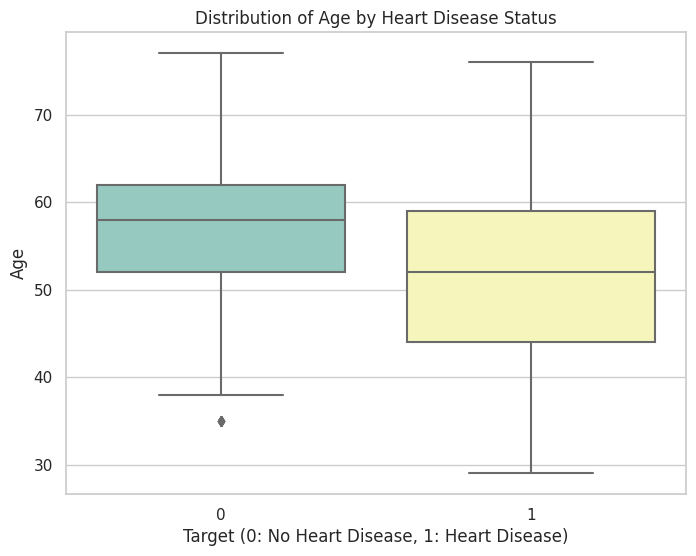

In [133]:
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(x="target", y="age", data=df, palette="Set3")

# Set labels and title
plt.xlabel("Target (0: No Heart Disease, 1: Heart Disease)")
plt.ylabel("Age")
plt.title("Distribution of Age by Heart Disease Status")

# Show the plot
plt.show()

Boxplot comparing the age of individuals with and without heart disease.

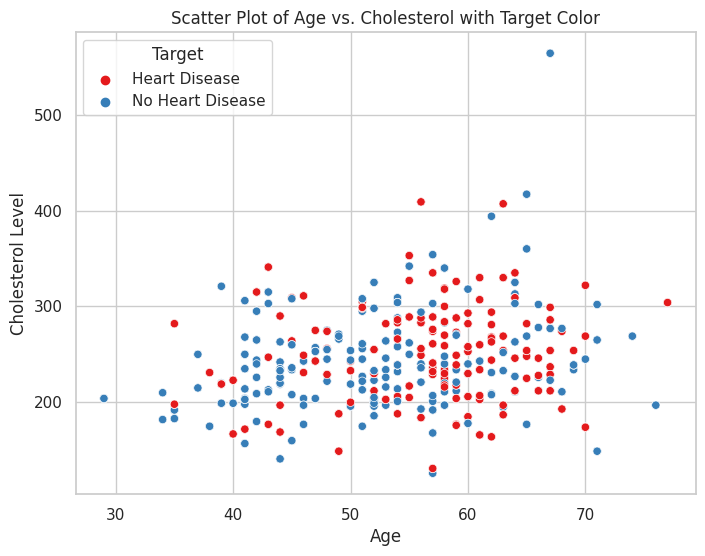

In [134]:


# Set the style for the plot (optional) Source : AI
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
scatter_plot = sns.scatterplot(x="age", y="chol", hue="target", data=df, palette="Set1")

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.title("Scatter Plot of Age vs. Cholesterol with Target Color")

# Modify legend labels and colors
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles, title="Target", labels=["Heart Disease", "No Heart Disease"])

# Show the plot
plt.show()



Based on the dataset, most people have heart disease from the age 50 to 70. Most of the population are accumulated within that range.

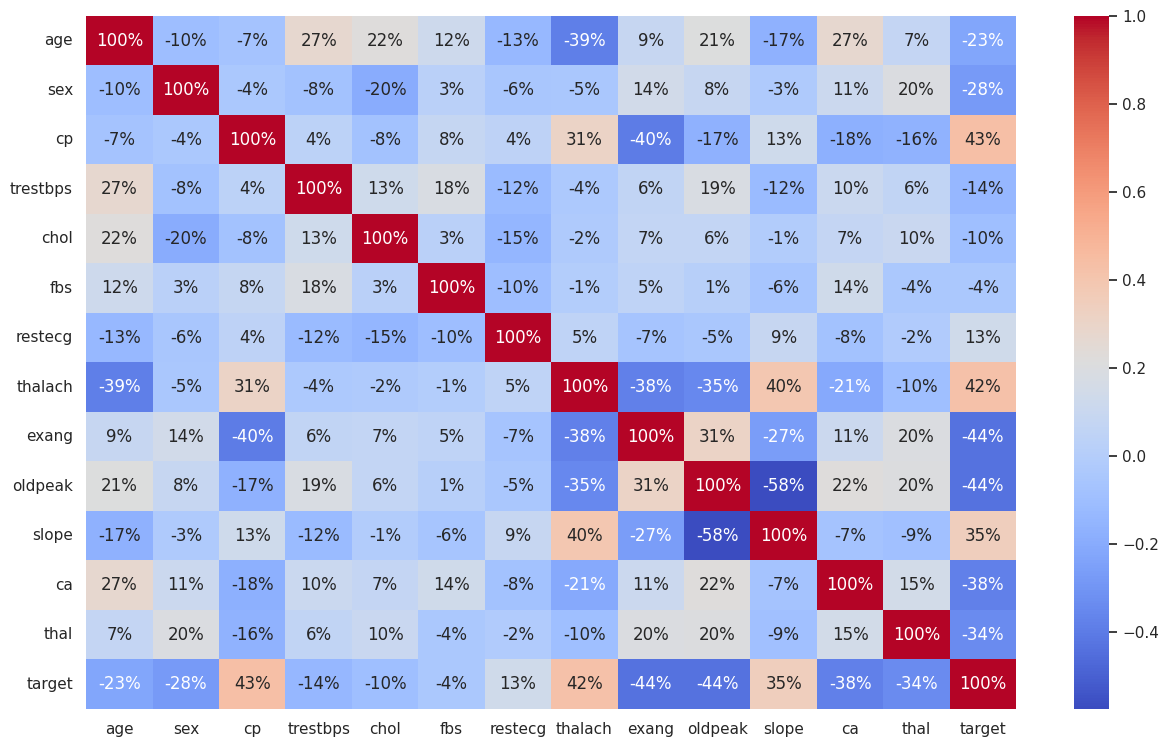

In [135]:
plt.figure(figsize=(15, 9))  # Adjust the figure size to your preference
# Create the correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')
plt.show()


Correlation matrix showing with a percetange how much different features correlate within eachother.

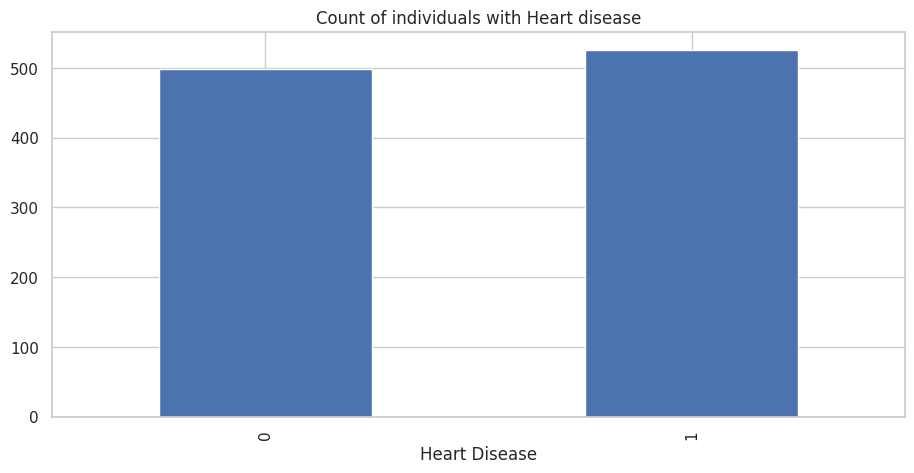

In [136]:
#created a bar graph to display the count of individuals with heart and without heart disease in our dataset.
ax = df['target'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of individuals with Heart disease',
          figsize=(11, 5))
ax.set_xlabel('Heart Disease')
plt.show()

Bar graph comparing the count of inviduals with heart disease and no heart disease.

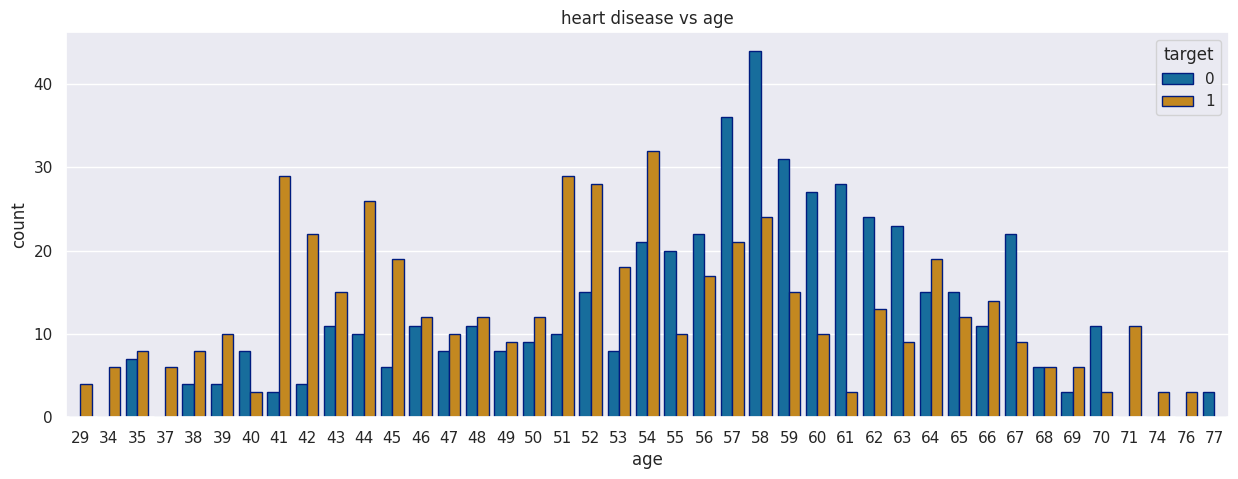

In [137]:
# Set the figure size for the plot using Seaborn's settings
sns.set(rc={'figure.figsize': (15, 5)})  # Set figure size

# Create a countplot using Seaborn
sns.countplot(
    x=df['age'],               # X-axis: 'age' column from the DataFrame 'df'
    hue=df['target'],          # Differentiate data by the 'target' column
    palette='colorblind',      # Use 'colorblind' color palette
    edgecolor=sns.color_palette('dark', n_colors=1)  # Set edge color for bars
).set(
    title='heart disease vs age'  # Set the title for the plot
)

# Display the plot
plt.show()

countplot: visualizing the individuals with heart disease and no heart disease by age.

In [138]:
#Separating the features from the labels
y = df[ "target"]

In [139]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [140]:
#Separating the features from the labels
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [141]:
#checking to see if everything is right.
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [142]:
#Splitting the Dataset into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=0)

In [143]:
#I standardize the dataset such that the mean value is 0 and the startd deviation is 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the models to the
training dataset

In [144]:
#imported all necessaries packages for all machine learning models learned in class.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


#here we are calling our KNN model knn.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#We are using a Gaussian distribution for the Naive Bayes classifier hence we chose the GaussianNB model.
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

# Train Support Vector Machine models with different kernels
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
# Train a linear SVM with 'one-vs-one' decision function and regularization parameter C=1

rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
# Train an SVM with Radial Basis Function (RBF) kernel, gamma=1, 'one-vs-one' decision function, and C=1

poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
# Train an SVM with polynomial kernel of degree 3, 'one-vs-one' decision function, and C=1

sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
# Train an SVM with sigmoid kernel, 'one-vs-one' decision function, and C=1

Performing 5-Fold Cross Validation for KNN

In [145]:
# Define the number of folds for cross-validation
k = 5

# Create a KFold cross-validation object with k splits
kf = KFold(n_splits=k)

# Perform cross-validation using k-fold on the knn model
result = cross_val_score(knn, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided knn model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.842433954933955



Performing 5-Fold Cross Validation for GNB

In [146]:

# Perform cross-validation using k-fold on the gnb (Gaussian Naive Bayes) model
result = cross_val_score(gnb, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided gnb model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.8158799533799534


Performing 5-fold Cross Validation on a Linear SVM

In [147]:
# Perform cross-validation using k-fold on the linear SVM model
result = cross_val_score(linear, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided linear SVM model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.832604895104895


Performing 5 Fold Cross Validation on a RBF SVM

In [148]:
# Perform cross-validation using k-fold on the rbf SVM model
result = cross_val_score(rbf, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided rbf SVM model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.9609265734265735



Performing 5 fold Cross Validation on Poly SVM

In [149]:
# Perform cross-validation using k-fold on the poly SVM model
result = cross_val_score(poly, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided poly SVM model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.9009809634809635


Performing 5 Fold Cross Validation on Sigmoid SVM

In [150]:
# Perform cross-validation using k-fold on the sigmoid SVM model
result = cross_val_score(sig, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided sigmoid SVM model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.7768356643356643


KNN - Using the model to make predictions on the test dataset

In [151]:
# Make predictions using the k-nearest neighbors (knn) model on the test data (X_test)
y_pred_knn = knn.predict(X_test)

GNB - Using the model to make predictions on the test dataset

In [152]:
# Make predictions using the Gaussian Naive Bayes (gnb) model on the test data (X_test)
y_pred_gnb = gnb.predict(X_test)

KNN - Classification Report

In [153]:
# Import the necessary library
from sklearn.metrics import classification_report  # Import classification_report from scikit-learn

# Generate and print a classification report for k-nearest neighbors predictions
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       145
           1       0.88      0.88      0.88       163

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308



GNB - Classification Report

In [154]:
# Generate and print a classification report for Gaussian Naive Bayes predictions
print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.84      0.87      0.86       163

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



Linear SVM Classification Report

In [155]:
# Make predictions using the linear SVM model on the test data (X_test)
svm_linear_pred = linear.predict(X_test)

# Generate and print a classification report for linear SVM predictions
print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       145
           1       0.82      0.93      0.87       163

    accuracy                           0.86       308
   macro avg       0.87      0.85      0.85       308
weighted avg       0.86      0.86      0.86       308



Poly SVM Classification Report

In [156]:
# Make predictions using the polynomial SVM model on the test data (X_test)
svm_poly_pred = poly.predict(X_test)

# Generate and print a classification report for polynomial SVM predictions
print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       145
           1       0.96      0.96      0.96       163

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



Sig SVM Classification Report

In [157]:
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       145
           1       0.78      0.83      0.81       163

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.79      0.79      0.79       308



Rbf Classification Report

In [158]:
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       145
           1       0.98      1.00      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Training a decision tree classifier

In [159]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Getting the Parameters of the Decision Tree




In [160]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Decision Tree - Making Predictions

In [161]:
y_pred_dt = dt.predict(X_test)

Decision Tree - Generating Classification Report

In [162]:

print(classification_report(y_test, y_pred_dt, target_names = ['negative', 'positive']))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       145
    positive       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [163]:
dt.feature_importances_

array([0.1044605 , 0.04147351, 0.25338609, 0.05629019, 0.11524295,
       0.        , 0.01746233, 0.05072519, 0.01801718, 0.08896395,
       0.00981094, 0.16134396, 0.08282321])

Generating feature importance for Decision trees.

In [164]:
feature_names = X.columns

In [165]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0,ascending=False)

In [166]:
feature_importance

,0
cp,0.253386
ca,0.161344
chol,0.115243
age,0.104461
oldpeak,0.088964
thal,0.082823
trestbps,0.056290
thalach,0.050725
sex,0.041474
exang,0.018017


<Axes: title={'center': 'feature importance via mean decrease in impurity'}>

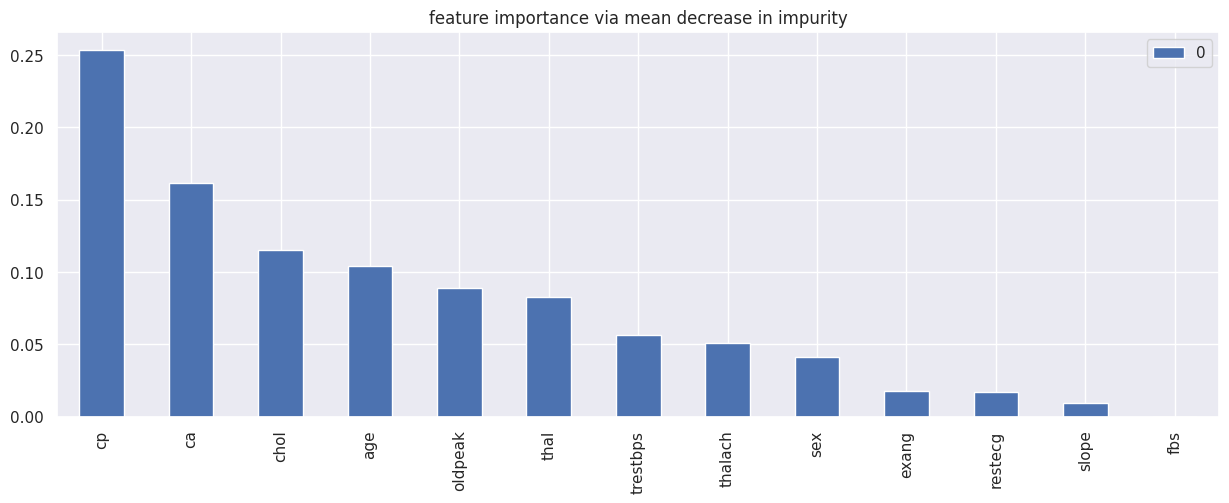

In [167]:
# Create a bar plot for feature importance
feature_importance.plot(kind='bar', title='feature importance via mean decrease in impurity')

Training the Random Forest Classifier

In [168]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=1)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

Random Forest - Making Predictions and Generating Classification Report

In [169]:
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [170]:
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names).sort_values(0,ascending=False)

generating feature importance for Random forest

In [171]:
feature_importance

,0
thal,0.141100
thalach,0.130384
ca,0.110355
oldpeak,0.098380
age,0.091332
cp,0.088179
chol,0.082011
trestbps,0.075480
exang,0.069202
sex,0.043980


Getting the X and y values ready for logistic regreesion

In [172]:
y = df [[ "target"]].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [173]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [174]:
# Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [175]:
## Standardizing the training data.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
## Train the logistic regression classifier
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()

#Note the use of .vales and .ravel()
#.values is used to extract the dataframe values to a numpy array

#ravel() is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
#The returned array has the same data type as the source array or input array.
classifier.fit(X_train, y_train.ravel())

LogisticRegression()

In [177]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Getting a set of the Predicted probabilities
probs_y=classifier.predict_proba(X_test)

In [178]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['Negative(%)', 'Positive(%)']])

In [179]:
probability

,Negative(%),Positive(%)
0,12.365010,87.634990
1,22.073330,77.926670
2,99.541420,0.458580
3,9.010127,90.989873
4,98.921736,1.078264
...,...,...
303,37.560565,62.439435
304,65.271824,34.728176
305,44.072192,55.927808
306,24.539503,75.460497


In [180]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [181]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [182]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In [183]:
comparison_of_true_pred

,y_test,y_pred,Negative(%),Positive(%)
0,1,1,12.365010,87.634990
1,0,1,22.073330,77.926670
2,0,0,99.541420,0.458580
3,1,1,9.010127,90.989873
4,0,0,98.921736,1.078264
...,...,...,...,...
303,1,1,37.560565,62.439435
304,1,0,65.271824,34.728176
305,0,1,44.072192,55.927808
306,1,1,24.539503,75.460497


In [184]:
## Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117  28]
 [ 13 150]]


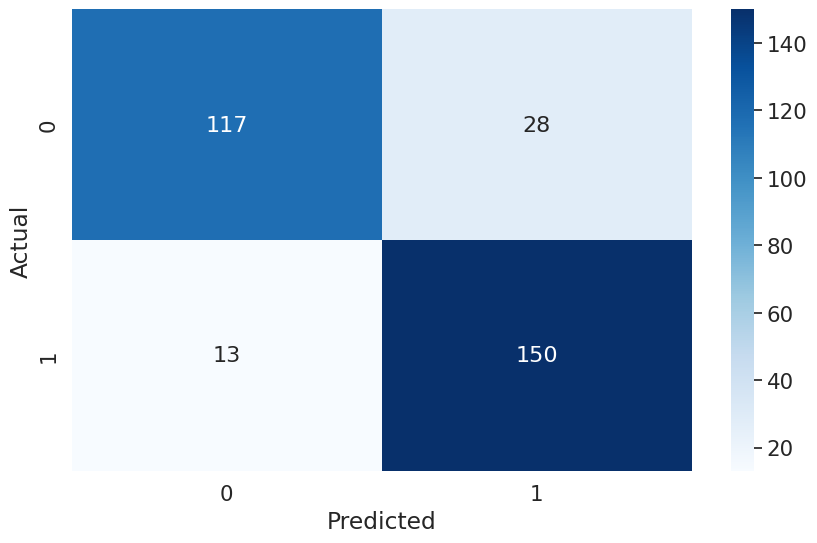

In [185]:
## Create a DataFrame from the confusion matrix with labels for rows and columns
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)  # for label size

# Use fmt parameter to specify the format of annotations
## Create a heatmap using seaborn
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='d')  # Use 'd' format for integers

plt.show()


In [186]:

#Generate the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       145
           1       0.84      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.86      0.87       308
weighted avg       0.87      0.87      0.87       308



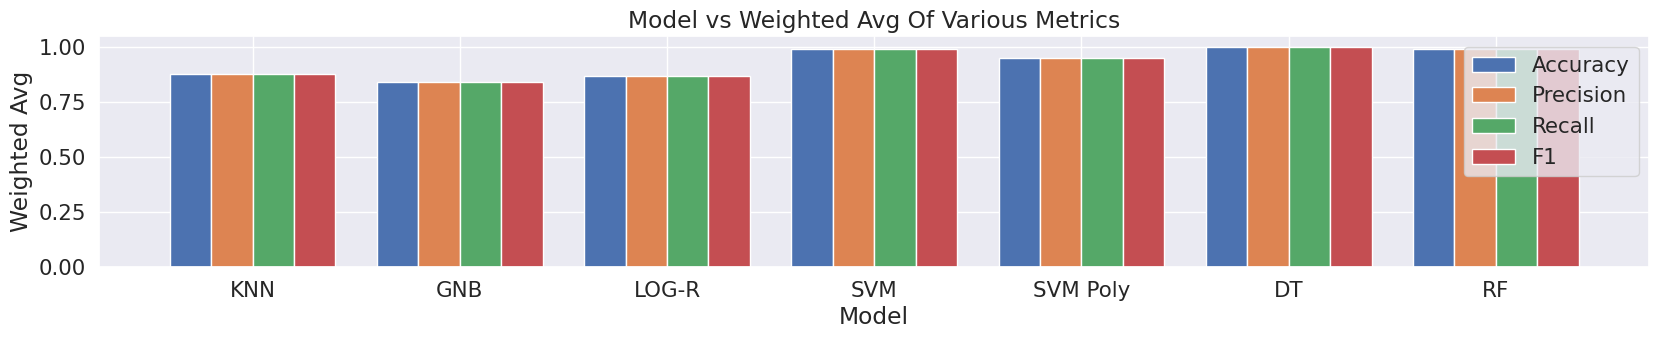

In [187]:
#Models
X = ['KNN', 'GNB', 'LOG-R', 'SVM', 'SVM Poly', 'DT', 'RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.88, 0.84, 0.87, 0.99, 0.95, 1.00, 0.99]
precision = [0.88, 0.84, 0.87, 0.99, 0.95, 1.00, 0.99]
recall = [0.88, 0.84, 0.87, 0.99, 0.95, 1.00, 0.99]
f1 = [0.88, 0.84, 0.87, 0.99, 0.95, 1.00, 0.99]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


In [188]:
import pickle

In [189]:
with open('model.pkl', 'wb') as f:
    pickle.dump(dt, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

Credit: Chatgpt for debugging when I got stuck.